In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dtime

In [128]:
from datetime import timedelta

In [129]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
#plt.rcParams['lines.markersize'] = 15
#plt.rcParams['pcolor.shading'] = 'nearest'

In [130]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos'

/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos


In [131]:
"""
def rotaciona_corrente(u, v, phi):
    u = np.array(u)
    v = np.array(v)
    
    phi = np.deg2rad(phi)
    ul = u * np.cos(phi) + v * np.sin(phi)
    vl = -u * np.sin(phi) + v * np.cos(phi)
    
    paralelo = pd.DataFrame(vl)
    perpendicular = pd.DataFrame(ul)
    
    return paralelo, perpendicular
""";

In [132]:
!ls

adcp_fortaleza.csv		  boia-zonal-limpo.csv	 vl_filtrado_total.csv
adcp_fortaleza_sem_cabecalho.csv  fortaleza.pdf		 vlSerie1.csv
adcp_fortaleza.xls		  ul_filtrado_total.csv  vlSerie2.csv
adcp_series_cortadas		  ulSerie1.csv
boia-meridional-limpo.csv	  ulSerie2.csv


In [133]:
dful1 = pd.read_csv('ulSerie1.csv', delimiter=';')
dfvl1 = pd.read_csv('vlSerie1.csv', delimiter=';')

In [134]:
dful2 = pd.read_csv('ulSerie2.csv', delimiter=';')
dfvl2 = pd.read_csv('vlSerie2.csv', delimiter=';')

In [135]:
dful1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,2.790259,3.747697,4.390195,6.221038e+00,6.476387,4.777278,8.295676,8.233303,8.570635,9.628068e+00,...,10.203772,12.324557,12.812204,12.893552,14.929196,17.156130,22.437219,28.754435,32.279778,2016-11-19 02:00:00+00:00
1,5.887022,5.593803,4.515630,4.672422e+00,5.557242,6.137534,8.300191,8.033059,12.133426,1.295207e+01,...,17.082939,16.439850,17.569432,17.986437,19.236069,21.186458,27.095238,24.088702,28.845526,2016-11-19 03:00:00+00:00
2,10.694729,8.480655,9.592180,8.515147e+00,9.999112,10.057587,9.969875,9.576305,10.088327,1.036396e+01,...,11.590226,13.186152,13.448377,14.876163,20.750747,23.158739,30.110877,29.530529,38.490189,2016-11-19 04:00:00+00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-19 05:00:00+00:00
4,0.497394,0.511356,-0.469470,-5.329071e-15,0.851548,1.785766,0.928327,-0.452017,-1.750887,-5.329071e-15,...,2.644570,2.634117,4.271745,6.870735,13.406957,17.894173,26.399771,29.865608,27.977255,2016-11-19 06:00:00+00:00


In [136]:
dful1.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
3511,53.993658,48.903733,46.803837,46.918552,46.905263,43.691771,37.001255,41.404874,42.187233,42.187233,...,24.554487,21.089218,19.217318,16.669090,17.943656,26.400000,25.421040,50.913551,65.374060,2017-04-14 09:00:00+00:00
3512,40.844026,35.668981,37.557725,42.593649,41.563573,38.250000,34.747970,38.154187,39.540794,45.497216,...,46.790272,41.138407,36.735270,36.570292,31.211307,32.841734,48.779621,53.685681,80.996971,2017-04-14 10:00:00+00:00
3513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-14 11:00:00+00:00
3514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-14 12:00:00+00:00
3515,57.545232,54.912141,44.545181,51.423009,54.251274,52.392926,45.858526,52.991273,54.659354,54.588644,...,60.905063,62.793394,64.155048,65.214899,68.881328,68.589552,61.721114,64.693586,43.520174,2017-04-14 13:00:00+00:00


In [9]:
dfvl1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,39.902562,42.836372,41.769920,44.264983,40.890297,38.907809,39.028089,38.734645,37.123499,35.932441,...,33.375036,30.504349,28.776682,28.959391,28.077733,26.418123,25.811068,24.995849,23.452632,2016-11-19 02:00:00+00:00
1,41.888339,45.557868,42.963346,44.455129,45.260105,43.670822,42.700782,41.326504,39.686647,42.364301,...,38.368909,35.255373,34.481952,32.448391,30.784146,32.624285,31.169506,26.753214,27.855801,2016-11-19 03:00:00+00:00
2,37.296954,36.733751,33.451907,31.778960,32.705623,32.896884,32.609992,35.739256,35.182178,36.143440,...,33.660461,32.636872,33.285900,31.902034,31.953349,31.875270,33.441517,31.667615,33.459010,2016-11-19 04:00:00+00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-19 05:00:00+00:00
4,28.495659,29.295537,26.895903,27.700000,24.385136,25.537640,26.583796,25.896055,25.038858,28.200000,...,25.161404,25.061952,24.226271,22.473162,21.455617,26.529202,25.493962,23.333570,22.655534,2016-11-19 06:00:00+00:00


In [47]:
dful2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,6.067726,1.318596e+01,19.004537,17.237815,19.022202,22.439128,1.535670e+01,18.778481,13.509796,2.087597,...,19.334686,24.915142,27.186641,22.215010,1.529948e+01,12.402269,1.381669,-19.531053,-22.812744,2017-07-02 07:00:00+00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-02 08:00:00+00:00
2,-2.553663,-8.881784e-15,-1.092354,-2.197329,-3.826697,1.040005,-5.329071e-15,1.632882,-0.657956,-2.406598,...,0.616070,0.609089,0.577675,1.176113,-8.881784e-15,-3.501704,-19.318262,-23.597941,11.576769,2017-07-02 09:00:00+00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-02 10:00:00+00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-02 11:00:00+00:00


In [48]:
dful2.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-19 04:00:00+00:00
1894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-19 05:00:00+00:00
1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-19 06:00:00+00:00
1896,6.251897,1.971822,3.620361,6.487506,6.658551,3.062684,4.216945,2.580163,5.211913,4.793566,...,3.829630,7.473596,6.459075,9.463826,8.960246,8.416174,5.383216,11.414352,23.224662,2017-09-19 07:00:00+00:00
1897,9.847005,7.765693,10.797651,14.415834,14.105638,14.002110,15.027906,16.603976,19.254779,17.255112,...,22.532277,19.816689,15.574457,14.719035,1.772894,7.223084,2.118399,10.131958,-3.888562,2017-09-19 08:00:00+00:00


In [50]:
Time1 = pd.date_range(start='2016-11-19 02:00', end = '2017-04-14 13:00', freq='1H')
Time2 = pd.date_range(start='2017-07-02 07:00', end = '2017-09-19 08:00', freq='1H')

In [51]:
dful1.drop(['time'], axis=1, inplace=True)
dfvl1.drop(['time'], axis=1, inplace=True)

dful2.drop(['time'], axis=1, inplace=True)
dfvl2.drop(['time'], axis=1, inplace=True)

In [52]:
z = list(np.arange(5.5, 55, 2.5))

In [53]:
list(enumerate(z))

[(0, 5.5),
 (1, 8.0),
 (2, 10.5),
 (3, 13.0),
 (4, 15.5),
 (5, 18.0),
 (6, 20.5),
 (7, 23.0),
 (8, 25.5),
 (9, 28.0),
 (10, 30.5),
 (11, 33.0),
 (12, 35.5),
 (13, 38.0),
 (14, 40.5),
 (15, 43.0),
 (16, 45.5),
 (17, 48.0),
 (18, 50.5),
 (19, 53.0)]

In [54]:
dful1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2538.000000,2.538000e+03,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2.538000e+03,2538.000000,2538.000000,2538.000000,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,4.220846,6.377069e+00,6.738014e+00,6.740166,6.845929,6.827285,6.822529,7.021877,7.137256,6.964146,6.555039e+00,5.881257,4.757631,2.987191,5.100665e-01,-2.898443,-7.227847,-13.178288,-20.444644,-26.625618
std,10.411944,9.885565e+00,9.700723e+00,9.433265,9.232943,8.975155,8.783302,9.116346,9.302094,9.471883,9.632151e+00,9.854315,10.118482,10.628484,1.159209e+01,13.203716,15.847453,20.257659,26.395255,32.048035
min,-29.859582,-2.657209e+01,-2.151856e+01,-19.203798,-19.566991,-18.891036,-18.510680,-18.450232,-23.970920,-29.205901,-3.020547e+01,-29.241007,-30.780008,-34.222606,-5.595015e+01,-71.694004,-88.435862,-118.376079,-152.676743,-185.804640
25%,-2.014189,-1.065814e-14,-5.329071e-15,0.052357,0.530097,0.648768,0.646472,0.589891,0.568490,0.433692,-5.329071e-15,-0.643994,-2.177232,-4.134121,-7.148466e+00,-11.029370,-16.561162,-23.251445,-33.400817,-42.426014
50%,3.436774,5.916213e+00,6.027169e+00,6.003801,6.182043,6.293966,6.328360,6.358811,6.445181,6.217478,5.794887e+00,5.079707,4.212072,2.565578,-3.552714e-15,-2.850868,-6.703541,-11.856846,-17.923648,-23.774882
75%,8.985681,1.241808e+01,1.269916e+01,12.403328,12.557121,12.422770,12.411926,12.565979,12.661110,12.500236,1.205870e+01,11.530809,10.644459,9.363736,7.497128e+00,5.092939,2.368788,-1.120102,-4.555105,-7.518373
max,79.964585,5.618943e+01,5.287836e+01,51.423009,54.251274,52.392926,45.858526,52.991273,54.659354,54.588644,5.689978e+01,60.905063,62.793394,64.155048,6.521490e+01,68.881328,68.589552,88.146271,106.176497,109.929712


In [55]:
dfvl1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,35.436098,38.186447,37.564875,36.756643,35.990582,35.101215,34.087228,33.947918,33.454158,3.292628e+01,32.416534,31.952026,31.369786,30.525750,29.435564,28.295272,28.321511,28.196265,28.704665,32.363455
std,14.933156,16.832666,16.339978,15.871999,15.359249,14.650425,14.049251,14.101954,13.822349,1.362015e+01,13.329122,12.892610,12.684841,12.783722,13.104268,13.740945,14.957204,16.841396,19.783772,24.239994
min,2.362160,4.101219,3.485690,2.956823,3.900320,3.681689,3.524765,4.247060,4.131350,8.881784e-15,-2.608004,-3.781515,-2.351663,-10.595371,-20.090369,-21.301419,-23.211147,-23.755409,-50.982399,-63.908570
25%,25.609720,27.261611,26.385949,25.831715,25.335750,24.919127,24.270844,23.815764,23.704970,2.338231e+01,23.205806,23.139160,22.506007,21.701597,20.638914,19.438035,18.349528,17.158122,15.625391,16.010822
50%,33.041466,34.747498,34.489149,33.712552,33.146338,32.727379,31.986751,31.664932,31.285346,3.098166e+01,30.471167,30.202476,30.195400,29.584476,28.814792,28.202264,28.255527,27.750877,27.660835,29.944078
75%,42.379833,44.819692,44.069049,43.878621,43.504274,42.567579,41.505865,41.404020,40.793751,4.033686e+01,39.675502,39.160205,39.044695,37.981950,37.070170,36.623762,37.888429,39.004013,40.811407,47.385912
max,118.552373,127.395062,108.382033,104.045583,98.041471,97.568062,94.457306,92.144388,86.521499,8.193022e+01,83.102883,88.049199,84.318245,79.830530,77.473256,85.194658,86.026144,93.994121,109.263926,140.108312


In [120]:
dful1.iloc[:,[1,4,10,14,18]].min()

1     -26.572090
4     -19.566991
10    -30.205472
14    -55.950146
18   -152.676743
dtype: float64

In [121]:
dful1.iloc[:,[1,4,10,14,18]].max()

1      56.189435
4      54.251274
10     56.899778
14     65.214899
18    106.176497
dtype: float64

In [122]:
dful1.iloc[:,[1,4,10,14,18]].mean()

1      6.377069
4      6.845929
10     6.555039
14     0.510067
18   -20.444644
dtype: float64

In [123]:
dfvl1.iloc[:,[1,4,10,14,18]].min()

1      4.101219
4      3.900320
10    -2.608004
14   -20.090369
18   -50.982399
dtype: float64

In [124]:
dfvl1.iloc[:,[1,4,10,14,18]].max()

1     127.395062
4      98.041471
10     83.102883
14     77.473256
18    109.263926
dtype: float64

In [125]:
dfvl1.iloc[:,[1,4,10,14,18]].mean()

1     38.186447
4     35.990582
10    32.416534
14    29.435564
18    28.704665
dtype: float64

## checando os valores negativos

In [62]:
dful1[dful1<0].count()/len(dful1)

0     0.250853
1     0.197099
2     0.186576
3     0.180603
4     0.174061
5     0.173777
6     0.168089
7     0.170933
8     0.171786
9     0.176052
10    0.188282
11    0.201650
12    0.242036
13    0.294369
14    0.362912
15    0.441695
16    0.500853
17    0.561149
18    0.594425
19    0.608362
dtype: float64

In [63]:
dfvl1[dfvl1<0].count()/len(dfvl1)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000853
11    0.000853
12    0.000569
13    0.003697
14    0.008817
15    0.013936
16    0.019909
17    0.032139
18    0.046928
19    0.051479
dtype: float64

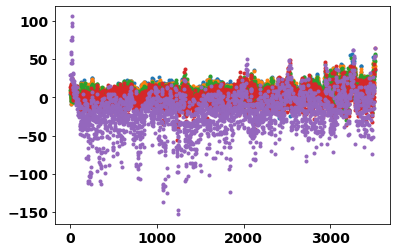

In [64]:
plt.plot(dful1.iloc[:,[1, 4, 10, 14, 18]],'.')

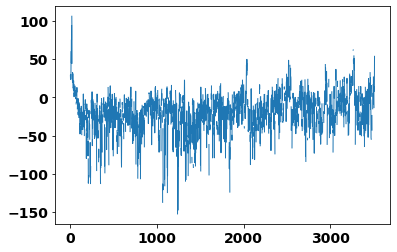

In [65]:
plt.plot(dful1.iloc[:,18])

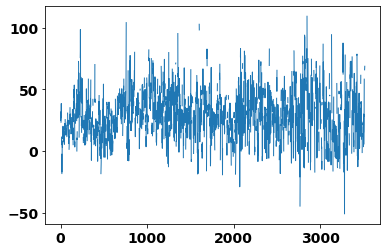

In [66]:
plt.plot(dfvl1.iloc[:,18])

In [67]:

"""
fig, ax = plt.subplots()

ax.hist(dful1.iloc[:, 1], bins=5, rwidth=.87)

yticks = list(ax.get_yticks())

ax.set_ylim([0, max(yticks)])

yticks = ['{:.1f}'.format(round(100*float(ii)/len(dful1))) for ii in yticks]

ax.set_yticklabels(yticks)
ax.set_xticks(range(-40, 70, 10))
""";

# SERIE 2

In [68]:
dful2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1.135000e+03,1135.000000
mean,6.980530,8.877782,9.836739,9.940926,9.987112,10.008288,9.759234,9.908126,9.621212,8.929660,8.032893,6.998787,5.344146,2.336796,-0.670488,-4.459534,-7.769188,-11.585727,-1.493254e+01,-3.094613
std,8.983683,10.314920,9.681935,9.768587,9.898825,9.561951,8.648782,8.956521,8.822064,8.634723,8.834547,9.380212,10.114172,11.413974,12.890153,14.535929,16.603795,18.815455,2.082752e+01,25.240351
min,-21.222328,-25.928000,-22.301149,-70.161311,-109.816408,-107.467627,-15.123127,-67.159068,-46.770516,-20.083940,-22.754681,-27.233471,-32.868557,-49.488572,-48.000000,-62.600984,-77.565926,-75.468253,-1.117843e+02,-88.960245
25%,0.983868,2.294988,3.210167,3.925292,3.745777,3.883928,4.080914,4.006712,3.757931,3.292302,2.137924,0.813219,-0.749581,-4.279395,-8.670937,-13.049248,-17.951517,-24.049220,-2.849552e+01,-19.565709
50%,6.422350,8.335113,9.486822,9.764937,10.088143,9.751058,9.380459,9.846221,9.795839,9.133013,8.378775,7.598851,6.229896,3.494945,1.217992,-1.731015,-5.159620,-8.750596,-1.289020e+01,-2.111420
75%,12.443236,15.199685,15.796400,15.989442,16.007080,15.803627,15.213104,15.428749,15.463530,14.762130,13.924465,13.561058,12.404807,10.270838,8.420409,6.418017,4.829312,2.638067,-5.329071e-15,11.648611
max,41.946507,48.224682,47.057887,45.557490,39.166724,38.294144,38.185602,38.275435,36.880965,37.206806,35.822542,35.716558,36.250031,33.985476,51.871033,28.700000,28.334676,31.115173,3.855273e+01,126.823319


In [69]:
dfvl2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,38.835249,43.295225,42.136512,41.333714,40.672528,40.182781,39.452145,39.875093,39.766783,39.464275,39.553478,39.737878,40.032730,39.862913,39.606109,39.204086,40.690743,41.609181,42.378463,53.668616
std,12.252278,15.562904,15.238711,14.943825,14.401847,14.524516,12.948049,13.433574,13.423640,12.934041,13.215334,13.087434,13.715842,14.225524,15.349831,17.172061,19.301190,21.351011,23.920984,27.431906
min,-37.735479,-58.252459,-49.727847,-112.281568,-135.611970,-171.984154,-41.786193,-99.567412,-110.184431,-67.384445,-87.779536,-62.262169,-95.565021,-73.369825,-83.138439,-87.730594,-102.322149,-110.297658,-109.808164,-40.330146
25%,30.910406,32.819857,31.758396,31.597594,31.497818,31.271630,30.775529,31.298944,31.426038,31.117549,30.995335,30.709563,31.412216,30.630362,29.283598,28.433706,28.383416,28.499736,26.426478,34.286393
50%,38.000000,42.641481,41.897913,40.705745,39.681424,39.490758,38.880604,39.144469,39.095501,38.500000,38.594121,38.917782,38.620455,38.339459,38.189641,38.309022,38.994060,40.246266,39.944374,51.240939
75%,46.066993,52.472703,51.140365,50.501512,49.220038,48.529267,46.677369,47.591903,47.447016,46.958438,47.053012,47.334626,47.887471,47.959220,48.136025,48.814740,52.255606,54.171616,57.173196,71.170567
max,86.945536,104.802952,98.086852,98.048693,93.745396,93.021837,89.622562,90.421542,88.815802,87.266657,85.794216,86.225192,87.244807,90.867327,93.585744,104.445132,112.782820,130.103028,140.800000,159.548895


In [112]:
dful2.iloc[:,[1,4,10,14,18]].mean()

1      8.877782
4      9.987112
10     8.032893
14    -0.670488
18   -14.932542
dtype: float64

In [114]:
dful2.iloc[:,[1,4,10,14,18]].min()

1     -25.928000
4    -109.816408
10    -22.754681
14    -48.000000
18   -111.784261
dtype: float64

In [115]:
dful2.iloc[:,[1,4,10,14,18]].mean()

1      8.877782
4      9.987112
10     8.032893
14    -0.670488
18   -14.932542
dtype: float64

In [116]:
dfvl2.iloc[:,[1,4,10,14,18]].mean()

1     43.295225
4     40.672528
10    39.553478
14    39.606109
18    42.378463
dtype: float64

In [117]:
dfvl2.iloc[:,[1,4,10,14,18]].min()

1     -58.252459
4    -135.611970
10    -87.779536
14    -83.138439
18   -109.808164
dtype: float64

In [118]:
dfvl2.iloc[:,[1,4,10,14,18]].max()

1     104.802952
4      93.745396
10     85.794216
14     93.585744
18    140.800000
dtype: float64

In [76]:
"""
fig, ax = plt.subplots()

ax.hist(dfvl2.iloc[:,[1, 4, 10, 14, 18]], bins=5, rwidth=None)

yticks = list(ax.get_yticks())

ax.set_ylim([0, max(yticks)])

yticks = ['{:.1f}'.format(round(100*float(ii)/len(dful1))) for ii in yticks]

ax.set_yticklabels(yticks)
""";